# Oversampling

# 필요 라이브러리 호출

In [1]:
#가시화용 라이브러리 2종 호출
import matplotlib.pyplot as plt
import seaborn as sns

# dataset 생성 라이브러리 호출
from sklearn.datasets import make_classification

# 1. DATA  POINTS

In [2]:
# imbalanced dataset 해결용 라이브러리 호출
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 실험용 데이터 셋 생성 (blobs)
# 가시화를 위해 n_features = 2차원으로 생성, 데이터 생성 알고리즘의 효고를 비교하기 위해 각각 1%, 5%, 94%생성
# SMOTE와 ADASYN을 위해 각 데이터 군집은 클래스별로 1개씩 존재한다고 가정
X, y = make_classification(n_samples=5000, n_features=2,
                           n_redundant=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           random_state=0)

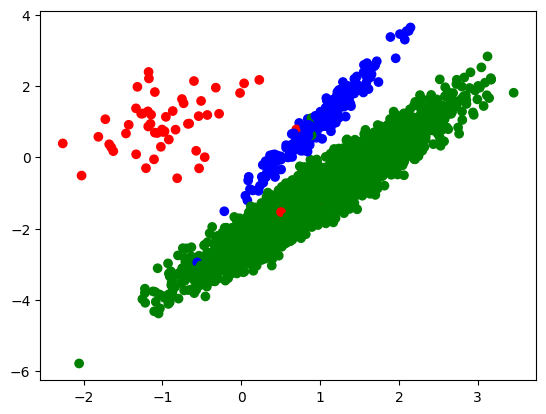

In [4]:
#데이터 구분을 위해 데이터 포인트마다 색 부여
colors = ['red' if v == 0 else 'blue' if v == 1 else 'green' for v in y]

#생성된 데이터 포인트들의 가시화
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.show()

### SMOTE

-  K-NN기반의 데이터 포인트 증폭 알고리즘

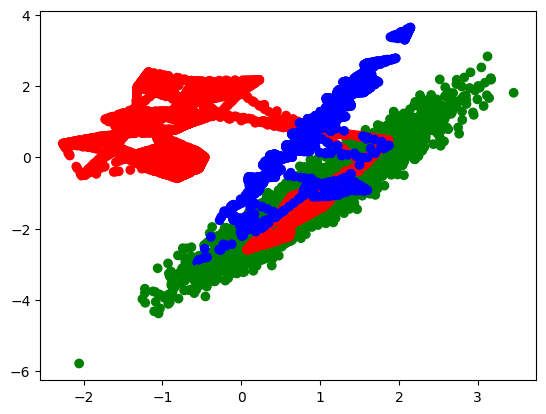

In [5]:
#SMOTE 라이브러리 호출
from imblearn.over_sampling import SMOTE

#위에서 생성된 데이터 포인트를 SMOTE로 증폭
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

#데이터 구분을 위해 데이터 포인트마다 색 부여
colors = ['red' if v == 0 else 'blue' if v == 1 else 'green' for v in y_resampled]

#생성된 데이터 포인트들의 가시화
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors)
plt.show()

### ADASYN

- SMOTE의 단점을 보완
- SMOTE에서는 최근접 이웃의 클래스중 가장 많은 클래스만을 활용하여 데이터를 생성하였다면, ADASYN은 주변에 다른 클래스 데이터가 많을수록 생성률을 높임

In [6]:
from collections import Counter
from imblearn.over_sampling import ADASYN 

random_state = 42

print('Original dataset %s' % Counter(y))

ada = ADASYN(random_state=random_state)
X_ada, y_ada = ada.fit_resample(X, y)

print('Resampled dataset %s' % Counter(y_ada))

Original dataset Counter({2: 4674, 1: 262, 0: 64})
Resampled dataset Counter({0: 4679, 2: 4674, 1: 4659})


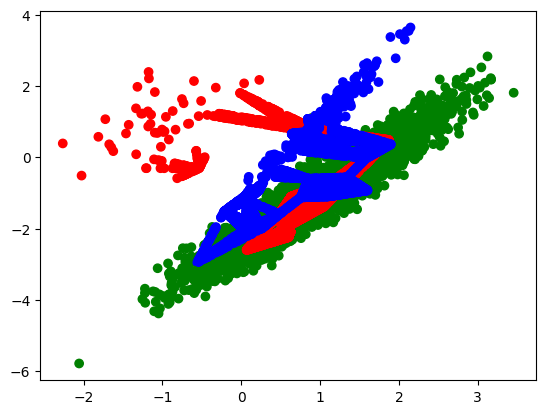

In [7]:
#데이터 구분을 위해 데이터 포인트마다 색 부여
colors = ['red' if v == 0 else 'blue' if v == 1 else 'green' for v in y_ada]

#생성된 데이터 포인트들의 가시화
plt.scatter(X_ada[:, 0], X_ada[:, 1], c=colors)
plt.show()

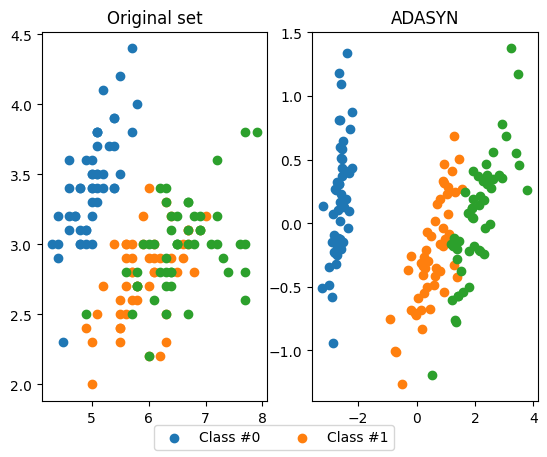

In [9]:
# PCA를 사용하여 고차원에서의 Data augmentation효과를 확인해보기

#PCA 라이브러리와 데이터 셋 호출을위한 sklearn datasets 호출
from sklearn.decomposition import PCA
from sklearn import datasets

#iris 데이터 셋 호출
iris = datasets.load_iris()
X = iris.data
y = iris.target

#ADASYN 적용
ada = ADASYN(random_state=random_state)
X_ada, y_ada = ada.fit_resample(X, y)

#원본 데이터와 ADASYN 데이터에 각각 PCA 적용
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)
X_ada_vis = pca.fit_transform(X_ada)

# 
fig, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_ada[y==0, 0], X_ada[y == 0, 1], label="Class #0")
c1 = ax1.scatter(X_ada[y==1, 0], X_ada[y== 1, 1], label="Class #1")
c2 = ax1.scatter(X_ada[y==2, 0], X_ada[y== 2, 1], label="Class #1")
ax1.set_title('Original set')


d0 = ax2.scatter(X_ada_vis[y_ada == 0, 0], X_ada_vis[y_ada == 0, 1], label="Class #0")
d1 = ax2.scatter(X_ada_vis[y_ada == 1, 0], X_ada_vis[y_ada == 1, 1], label="Class #1")
d2 = ax2.scatter(X_ada_vis[y_ada == 2, 0], X_ada_vis[y_ada == 2, 1], label="Class #2")
ax2.set_title('ADASYN')

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2)

plt.show()